In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from typing import List, Dict, Tuple, Any
import sys
import os

root_path = os.path.abspath(os.path.join(os.path.dirname(Path.cwd()), '.'))
sys.path.append(root_path)

root_path

from datamodel import *

In [3]:
# Load data
root_dir = Path.cwd().parent
data_dir = root_dir / 'data'

day_minus_2 = pd.read_csv(data_dir / 'prices_round_1_day_-2.csv', sep=';')
day_minus_1 = pd.read_csv(data_dir / 'prices_round_1_day_-1.csv', sep=';')
day_0 = pd.read_csv(data_dir / 'prices_round_1_day_0.csv', sep=';')

price_data = pd.concat([day_minus_2, day_minus_1, day_0], axis=0)
price_data = price_data.reset_index(drop=True)
price_data_amethyst = price_data[price_data["product"] == "AMETHYSTS"].copy()
price_data_amethyst = price_data_amethyst.reset_index(drop=True)
price_data_starfruit = price_data[price_data["product"] == "STARFRUIT"].copy()
price_data_starfruit = price_data_starfruit.reset_index(drop=True)

trades_minus_2 = pd.read_csv(data_dir / 'trades_round_1_day_-2_nn.csv', sep=';')
trades_minus_1 = pd.read_csv(data_dir / 'trades_round_1_day_-1_nn.csv', sep=';')
trades_0 = pd.read_csv(data_dir / 'trades_round_1_day_0_nn.csv', sep=';')

trades = pd.concat([trades_minus_2, trades_minus_1, trades_0], axis=0)
trades = trades.reset_index(drop=True)
trades_amethyst = trades[trades["symbol"] == "AMETHYSTS"].copy()
trades_amethyst = trades_amethyst.reset_index(drop=True)
trades_starfruit = trades[trades["symbol"] == "STARFRUIT"].copy()
trades_starfruit = trades_starfruit.reset_index(drop=True)

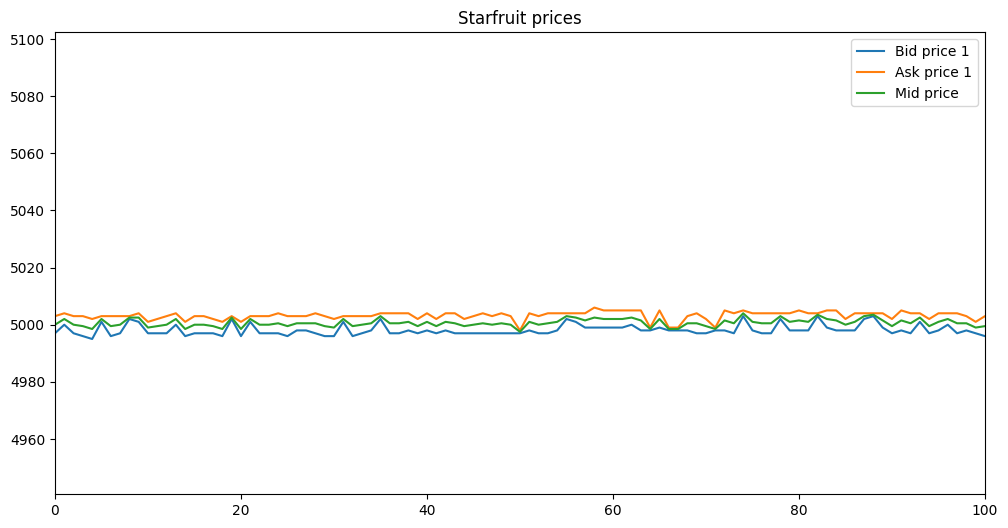

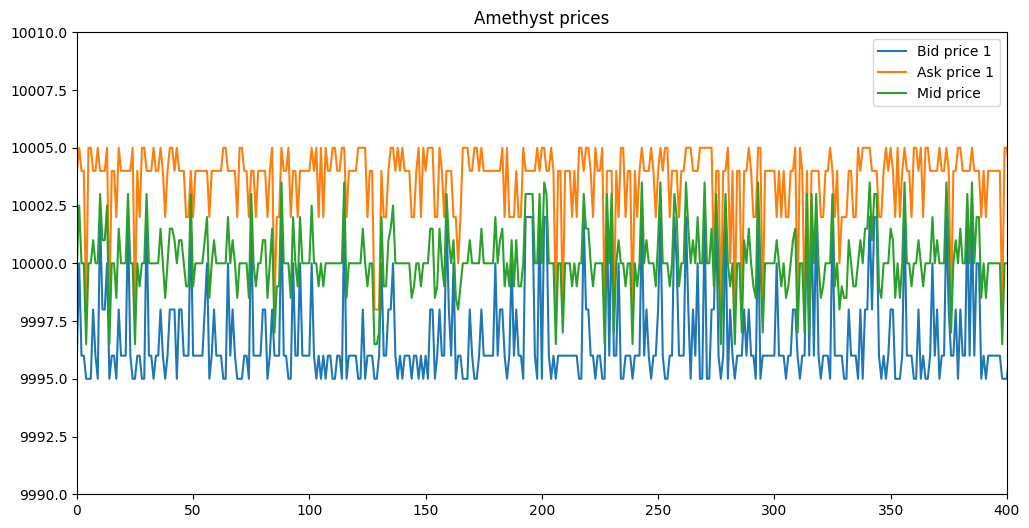

In [11]:
# Plot bid_price_1, ask_price_1 and mid price for starfruit
plt.figure(figsize=(12, 6))
plt.plot(price_data_starfruit["bid_price_1"], label="Bid price 1")
plt.plot(price_data_starfruit["ask_price_1"], label="Ask price 1")
plt.plot(price_data_starfruit["mid_price"], label="Mid price")
plt.title("Starfruit prices")
plt.xlim(0,100)
plt.legend()
plt.show()

# Plot bid_price_1, ask_price_1 and mid price for amethyst, set y-axis range from 9000 to 11000

plt.figure(figsize=(12, 6))
plt.plot(price_data_amethyst["bid_price_1"], label="Bid price 1")
plt.plot(price_data_amethyst["ask_price_1"], label="Ask price 1")
plt.plot(price_data_amethyst["mid_price"], label="Mid price")
plt.title("Amethyst prices")
plt.ylim(9990, 10010)
plt.xlim(0,400)
plt.legend()
plt.show()

In [7]:
price_data_amethyst

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
2,-2,200,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,0.0
3,-2,300,AMETHYSTS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,0.0
4,-2,400,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
29996,0,999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
29997,0,999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
29998,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0


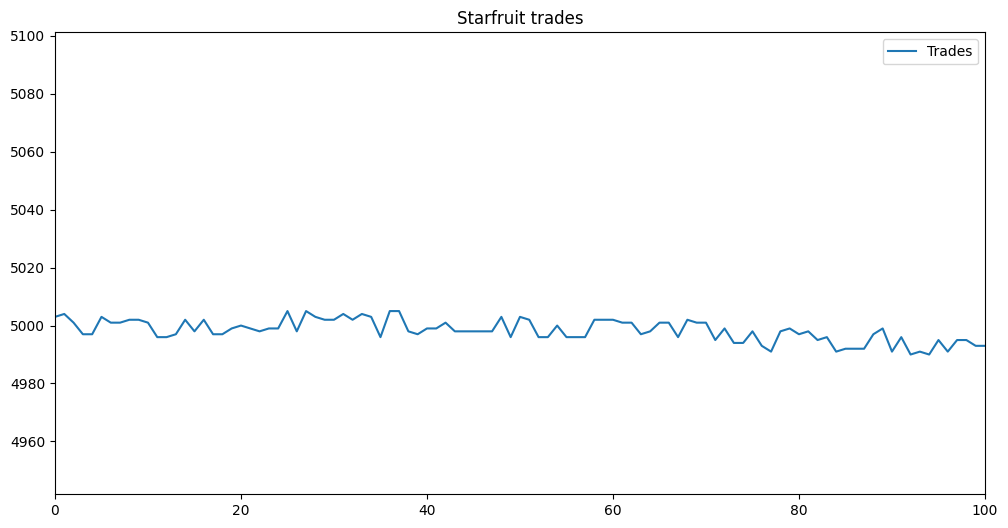

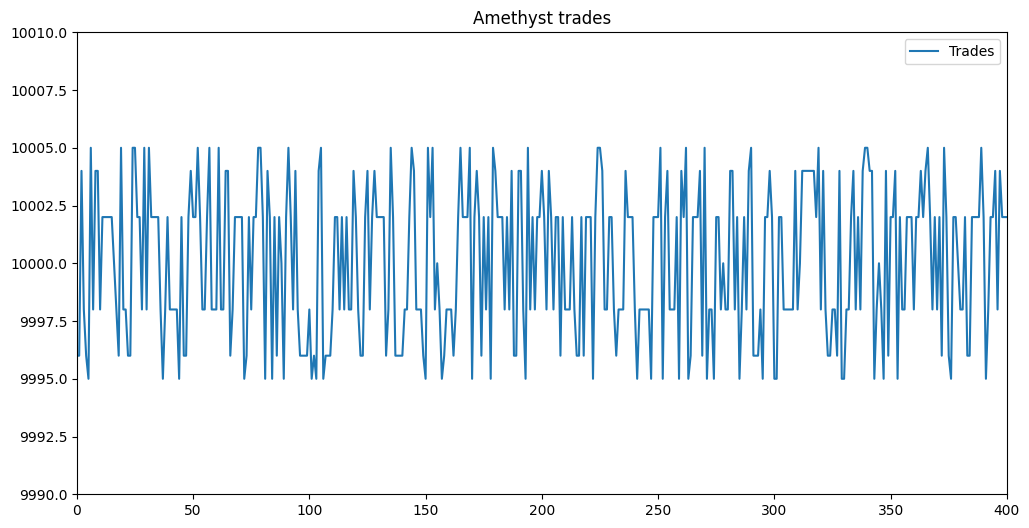

In [14]:
# Plot the trades for starfruit
plt.figure(figsize=(12, 6))
plt.plot(trades_starfruit["price"], label="Trades")
plt.title("Starfruit trades")
plt.xlim(0,100)
plt.legend()
plt.show()

# Plot the trades for amethyst
plt.figure(figsize=(12, 6))
plt.plot(trades_amethyst["price"], label="Trades")
plt.title("Amethyst trades")
plt.xlim(0,400)
plt.ylim(9990, 10010)
plt.legend()
plt.show()

In [23]:
trades_amethyst

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
1,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
2,1500,NaN,NaN,AMETHYSTS,SEASHELLS,10004.0,1
3,2500,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,1
4,3200,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
...,...,...,...,...,...,...,...
7230,997600,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,4
7231,997700,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1
7232,998400,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,4
7233,998800,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1


In [29]:
price_data_amethyst.isna().sum()

day                    0
timestamp              0
product                0
bid_price_1            0
bid_volume_1           0
bid_price_2         7689
bid_volume_2        7689
bid_price_3        24859
bid_volume_3       24859
ask_price_1            0
ask_volume_1           0
ask_price_2         7688
ask_volume_2        7688
ask_price_3        24831
ask_volume_3       24831
mid_price              0
profit_and_loss        0
dtype: int64